#  Analysis of Titanic Passenger Data

This study is an excersize to show how to use foundations of Data Science in order to import, study, visualize, and present the raw data in a method that is easy for any user to digest and understand.

This study uses passenger data from the ill-fated maiden voyage of the RMS Titanic (1912). The data (and explanation of the data) can be obtained from: https://www.kaggle.com/c/titanic/data

First, the raw comma separated values (.cvs) data will be loaded into a Python (Pandas) dataframe.

Second, there will be some data exploration. This will be completed mostly by loading plots of different data slices in order to better understand the data with visualization.  Visualizing the data makes generating a hypothesis easier.

Third, the data will be analyzed.

Lastly, a function has been created where a user can input their personal information to see their chances of surviving the Titanic disaster.

**Note:** This is a Jupyter iPython Notebook. It allows code to be written, code output to be displayed, and also markup. It allows the analysis to be conducted and displayed. Comments that are intended for a general audience are presented in markup 'plain' text below each code segment. Comments that have to do with how the code works are above the code with a leading hashtag(#). However, due to the heavy display of Python code; it is not suitable for all audiencees. For example, if I were presenting my analysis to upper management, board of directors, a general audience, etc. I would not use this Notebook. I'd have much of the output in a PowerPoint type presentation. However, I would have the Jupyter Notebook available as a supplement, in case anyone wanted to see the code. Or, more importantly, the amount of work it took to create the pretty graphics.

## Questions...  Answered... With Data

The question in this study is 'What factors contributed to a survivors likelihood of surviving the Titanic disaster?'

## 1. Loading and Inspecting the Titanic Data

In [1]:
# Set AutoSave to 3 minutes
%autosave 180
# Import modules used in the analysis
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import matplotlib as mpl
import matplotlib.pyplot as plt
#matplotlib.style.use('seaborn-paper')

Autosaving every 180 seconds
Populating the interactive namespace from numpy and matplotlib


In [2]:
# The following code reads all the Titanic data into Pandas DataFrames
# empty data will be filled in as NaN
# The explanation of the data can be found:
# https://www.kaggle.com/c/titanic/data
titanic_df = pd.read_csv('titanic-data.csv', keep_default_na=True)
# Set index as PassengerId
titanic_df.set_index(['PassengerId'], inplace=True)

In [3]:
# Return shape to see how much data is being worked with
titanic_df.shape

(891, 11)

In [4]:
# Show counts and data types for all columns
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The first thing that caught my eye when running the .info function is that not every passenger has a value for cabin and age. 

Another thing that the .shape and .describe functions above indicate is that there are only 891 passengers in this dataset. According to the Wikipedia article on the titanic, the capacity figures are as follows:

Passengers: 2,435 | Crew: 892 | Total: 3,327 (or 3,547 according to other sources)

So, it looks like the dataset is not complete. Perhaps it is a sample, perhaps it is incomplete. We are not sure, but we will continue on.

In [5]:
# Inspect the data with .head
titanic_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The .head function gives us a preview of the data without having to load the entire dataset. It shows all the 'columns' of data for each passenger 'row'. As we saw above, we know that there was both passengers and crew on the titanic. Since this dataset includes  a column for 'Pclass', 'Ticket',  'Fare', and 'Cabin'; we can assume that this dataset only includes true **passengers** of the Titanic. It does not include crew.

In [6]:
# Get some quick and dirty statistics with pd.describe
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The pd.describe function will give lots of information that will most likely be needed later. So we'll pd.describe across the dataset. Some of this information is basically jiberish because it makes no sense to have something like a mean of unique passenger IDs (all unique) or survivalship (boolean).

## 2. Cleaning Data and Dealing With Missing Data

In this section, we'll assess if the data needs to be cleaned. The data will be cleaned if decided it will be beneficial to the analysis. First, let's see what columns are missing data, how many missing values are missing, and what percent of the column has missing data.

This will give us an idea of not only the number of missing values; but also the significance of this number of missing data.

In [7]:
# Find how many missing values and percentage missing in each column
print 'Missing data in each Titanic dataframe column:'
for c in titanic_df.columns:
    missing_data = len(titanic_df) - titanic_df[c].count()
    if (missing_data > 0 or missing_data =='NaN'):
        print c, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(titanic_df))) * 100, 3)), '% of total'

Missing data in each Titanic dataframe column:
Age : 177 missing values is 19.865 % of total
Cabin : 687 missing values is 77.104 % of total
Embarked : 2 missing values is 0.224 % of total


We can see that in this particular data set, there is a huge number of passeners missing cabin data, and a fairly high amount of passengers with missing age data. There are very few passengers with missing Port of Embarkation Data.

There are a number of methods that can be used to deal with this. Each has their pros and cons.
1. Drop value: This approach is acceptable if there isn't much data with missing variables.
2. Assign a value that shows data is missing: This approach could be appropriate for categories like Passenger Class and Cabin, as those are categorial variables. It wouldn't make much sense to do this on numeric data like age or fare.
2. Fill in age data by assigning a mean/median/mode value.
3. Somehow predict the missing ages by using other passenger data fields.

### 2.1. Cleaning Port of Embarkation

In [8]:
# Fill empty/NaN Embark values with most common Embark value
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(value=(titanic_df['Embarked'].value_counts().idxmax()))

Since so few passengers were missing Port of Embarkation data; the few missing values were simply replaced with the most common value in the column.

### 2.2. Cleaning Cabin

There's a huge amount of cabin data missing. We are also not yet sure of it's signifigance to surving the Titanic. Before we go about replacing missing Cabin data; let's take a look at what the Cabin data looks like:

In [9]:
# Print unique values in Cabin column
titanic_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

It appears that a Cabin on the Titanic starts with a letter and is followed by an integer. A bit of research on Titanic cabin letter indicate the deck.

Note that some passengers had multiple entries for their Cabin. These people had multiple cabins because of a large group or family. We can see by printing the unique Cabin numbers of passengers, all but one entry with multiple cabin entries had all cabins on the same deck, and adjacent to eachother on the same side of the Titanic.

I have a hunch that the deck a passenger was assigned to could have some impact on a passenger's overall survival. So, I will separate out this information.

In [10]:
# Take the first character from the Cabin colum and use that as value for new 'Deck' column
titanic_df['Deck'] = titanic_df['Cabin'].astype(str).str[0]
# Replace the 'n' character leftover from Pandas NaN (not a number) and make those ? to identify as missing
titanic_df['Deck'] = titanic_df['Deck'].replace('n', '?')

I want to leave the original 'Cabin' column alone in case I need to visit it later, but need to get the 'Deck' information assigned to each passenger. First, to separate out the Deck each passenger is on, I created a new column in the Pandas dataframe called 'Deck'. I then took the first character from the 'Cabin' column. Also, since the 'N' character from Pandas 'Not a Number' value copies over, the 'n' value needed to be replaced.

We are also not yet sure of it's signifigance to surving the Titanic. So, at this point in the analysis; we'll assign a value (?) to the missing Cabin data that shows us the value is missing. Later on, the fact that this information is missing could be found significant. 

### 2.3. Cleaning Name (Title)

The 'Name' column in the titanic dataframe appears to give __every__ single passenger a title of some kind. This 'title' may become important later on, so let's create a new column that just holds a passenger's title.

In [11]:
# Split passenger titles in Name category and place in new 'TitleF' column
titanic_df['TitleF'] = titanic_df['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
# Print unique passenger titles and their counts
titanic_df['TitleF'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Jonkheer          1
Don               1
Ms                1
Mme               1
Capt              1
the Countess      1
Sir               1
Name: TitleF, dtype: int64

Now that the titles derived from the passenger names have been printed and plotted; we can see there's quite a bit of them. Some of them are standard types of titles; but some are obscure and few are rare. Let's investigate these's obscure titles and see if they correlate with passenger sex:

In [12]:
# Are the titles Sex specific?
pd.crosstab(titanic_df['TitleF'], titanic_df['Sex'])

Sex,female,male
TitleF,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


It would be best if we could condense this list of titles and replace all the rare/unique titles and just use the most common four most popular titles (Mr, Miss, Mrs, Master) which also indicate sex _and_ age. Notice there's a female Dr. Wow, this would have been super uncommon in that time period. Just out of curiosity let's see if this is a fluke in the data:

In [13]:
# Find lone female Dr
titanic_df[(titanic_df['TitleF'] == 'Dr') & (titanic_df['Sex'] == 'female')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,TitleF
PassengerId,,,,,,,,,,,,,
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,D,Dr


I surely thought that the title of 'Dr' would have been 100% male. Sometimes it's good to take extra steps like above to make sure instead of assuming. Turns out this female Dr was Titanic Survivor Alice Leader: https://www.encyclopedia-titanica.org/titanic-survivor/alice-leader.html

Now I know I need to write code to separate out male and female doctors as Mr and Mrs, respectively.

In [14]:
# Create new 'TitleS' column to store shortened title from full 'TitleF' column
titanic_df['TitleS'] = titanic_df['TitleF']
# Replace adult female titles with 'Mrs'
titanic_df['TitleS'] = titanic_df['TitleS'].replace(['Lady', 'Mlle', 'Mme', 'Ms', 'the Countess'], 'Mrs')
# Replace adult male titles with 'Mr'
titanic_df['TitleS'] = titanic_df['TitleS'].replace(['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Mr')
# Replace females with title of Dr to Mrs
titanic_df['TitleS'] = titanic_df['TitleS'].replace(titanic_df['TitleS'].loc[(titanic_df.Sex == 'female') & (titanic_df.TitleF == 'Dr')], 'Mrs')
# Replace males with title of Dr to Mr
titanic_df['TitleS'] = titanic_df['TitleS'].replace(titanic_df['TitleS'].loc[(titanic_df.Sex == 'male') & (titanic_df.TitleF == 'Dr')], 'Mr')
# Print unique passenger TitleS
titanic_df['TitleS'].value_counts()

Mr        537
Miss      182
Mrs       132
Master     40
Name: TitleS, dtype: int64

It looks like this is pretty much these titles could be the only data that could possibly be used to estimate the age of a passenger. Let's check and see if title has something to do with age.

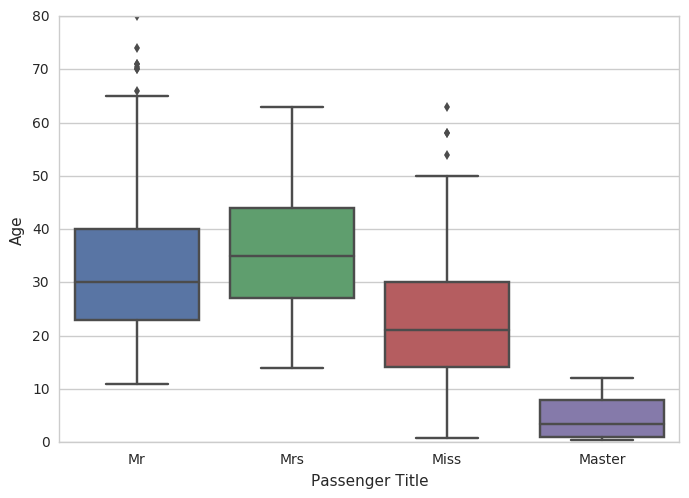

In [15]:
# Draw nested boxplot to show age by title
sns.boxplot(x='TitleS', y='Age', data=titanic_df)
plt.xlabel('Passenger Title')
plt.ylabel('Age')
plt.show()

 We can see how well the titles predict age by printing a boxplot to summarize the features of quantitative variables (outliers, max/min, upper/lower quartiles, and median).


### 2.4. Cleaning Age by creating 'Man, Woman, Child' category


In the boxplot above we can essentially see the Victorian era's definition of child and adult. This could be beneficial to isolate in order to predict Titanic survival; rather than the numeric value of someone's actual age. 

Now the passengers have been isolated into the four common titles of sex and age; Mr, Mrs, Miss, Master. So now, even though we do not have all the values filled in the 'Age' column; we do have some sort of column that can be used to predict age. So, I want to create another column ['MWC'] that dictates whether a passenger is a man, woman, or child.

Finding the men and women is simple. All those passengers with 'Mr' or 'Mrs' as their title would be considered Men or Women during the Titanic era. Finding male children is also simple; those with the title of 'Master' are male children. 

Finding female children is the difficult part; as the title of 'Miss' has quite the spread. In order to do the best attempt at classifying these Misses into Women or Children, this requires a bit of research into Victorian ages. Most historical research related to The Titanic  describe children as those 14 years of age and younger. So we will use that age. Notice, that this is very close to the lower quartile of the 'Miss' category in the boxplot above.

In [16]:
# Create new 'MWC' column to store Man, Woman, Child descriptions
titanic_df['MWC'] = titanic_df['TitleS']
# Replace 'Mr' with 'Man'
titanic_df['MWC'] = titanic_df['MWC'].replace('Mr', 'Man')
# Replace 'Mrs' with 'Woman'
titanic_df['MWC'] = titanic_df['MWC'].replace('Mrs', 'Woman')
# Replace 'Master' with 'Child'
titanic_df['MWC'] = titanic_df['MWC'].replace('Master', 'Child')
# Replace Misses with value in Age 14 and lower with 'Child'
titanic_df['MWC'] = titanic_df['MWC'].replace(titanic_df['MWC'].loc[(titanic_df.Age <= 14) & (titanic_df.MWC == 'Miss')], 'Child')
# Replace Misses with value in Age higher than 14 with 'Woman'
titanic_df['MWC'] = titanic_df['MWC'].replace(titanic_df['MWC'].loc[(titanic_df.Age > 14) & (titanic_df.MWC == 'Miss')], 'Woman')
# Print MWC stats
print titanic_df['MWC'].value_counts()
print ''
print titanic_df['MWC'].describe()

Man      537
Woman    241
Child     77
Miss      36
Name: MWC, dtype: int64

count     891
unique      4
top       Man
freq      537
Name: MWC, dtype: object


So now we have done the bulk of the work in dividing the passengers into the category of Man, Woman, or Child. Every title has been accounted for except for some still recorded as 'Miss'. These are the female passengers with the title of Miss who have an unknown Age. Here we will need to predict their age using the information we have available with the original Misses data. Let's get some statistical information from the 'Miss' passengers:

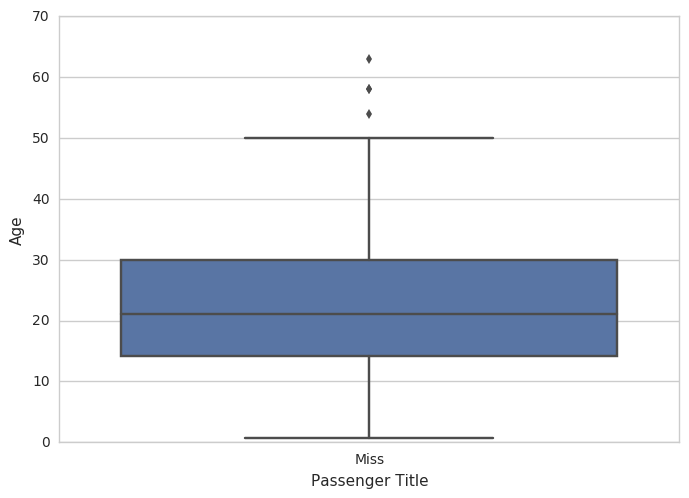

Misses Stats:
count    146.000000
mean      21.773973
std       12.990292
min        0.750000
25%       14.125000
50%       21.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64


In [17]:
# Draw nested boxplot to show age of Misses
sns.boxplot(x=titanic_df['TitleS'].loc[(titanic_df.TitleS == 'Miss')], y='Age', data=titanic_df)
plt.xlabel('Passenger Title')
plt.ylabel('Age')
plt.show()
print 'Misses Stats:'
print titanic_df[(titanic_df['TitleS'] == 'Miss')].Age.describe()

The above information gives us the statistical information of the Misses in the Titanic dataset. The above statistics are graphically represented in the box plot above, but we need the actual values. It would be simple to just replace the missing age values with the mean, but that would automatically make all those leftover Misses a Woman. Could we do something better? How about we recreate the above Age statistics. Then we'll use those values to predict whether those Misses are women or children.

[23 27 16 10  6 44 22 23 27 18 14 29 25 33 25 25 26 33 -5 23 15 31 10 16 36
 32  4 17 21 -3  2 18 11 12 24 23]


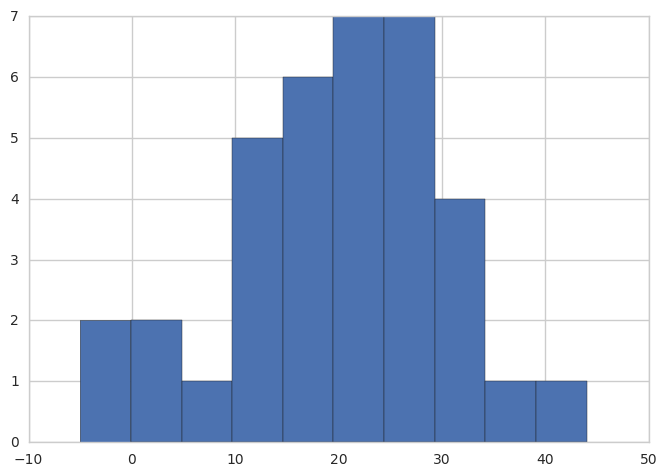

In [18]:
# Use Gaussian random number generator to create a series of numbers based on Misses Age statistics
# loc = mean of Misses Age, scale = std of Misses Age, size= number of Misses missing Age
# astype(int) to convert normally generated floats into int
random_misses = (np.random.normal(loc=titanic_df[(titanic_df['TitleS'] == 'Miss')].Age.mean(), scale=titanic_df[(titanic_df['TitleS'] == 'Miss')].Age.std(), size=len(titanic_df[(titanic_df['MWC'] == 'Miss') & (pd.isnull(titanic_df['Age']) == True)])).astype(int))
print random_misses
plt.hist(random_misses)
plt.show()

Above you can see the randomly generated integers based on the original statistics. The plot shows that these new numbers looks pretty close to a random normal distribution, so we will preceed with replacing the Misses with missing ages with this series:

**NOTE:** Mathematically speaking,  it's not always possible to have a gaussian random normal generator come up with only positive values. Also, mathetmatically speaking the generator generates floats. I converted these floats to ints so the fractions of a number are ignored. Converting the floats to ints is not 100% mathematically acurate; but for this excersize it will still work great. _You can refresh the above cell until you get a destribution you like or just use whatever is generated first._

In [19]:
# Mask the Misses without ages
titanic_df[(titanic_df['MWC'] == 'Miss')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,TitleF,TitleS,MWC
PassengerId,,,,,,,,,,,,,,,
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,?,Miss,Miss,Miss
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,?,Miss,Miss,Miss
48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,?,Miss,Miss,Miss
83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q,?,Miss,Miss,Miss
110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q,?,Miss,Miss,Miss
129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,F,Miss,Miss,Miss
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,?,Miss,Miss,Miss
199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q,?,Miss,Miss,Miss
230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,?,Miss,Miss,Miss


In [20]:
# loc the Misses without ages
titanic_df['MWC'].loc[(titanic_df.MWC == 'Miss')]

PassengerId
29     Miss
33     Miss
48     Miss
83     Miss
110    Miss
129    Miss
181    Miss
199    Miss
230    Miss
236    Miss
241    Miss
242    Miss
265    Miss
275    Miss
301    Miss
304    Miss
307    Miss
331    Miss
359    Miss
360    Miss
369    Miss
410    Miss
486    Miss
503    Miss
565    Miss
574    Miss
594    Miss
597    Miss
613    Miss
654    Miss
681    Miss
698    Miss
728    Miss
793    Miss
864    Miss
889    Miss
Name: MWC, dtype: object

## 3. Browsing the Data

Before we can see if any factors contribute to surviving the Titanic disaster; we'll explore the data. In this stage of the data analysis process we are looking for **trends**; not values.

### 3.1. Browsing the Data: Passenger Class

In [ ]:
# Titanic passneger class distribution
sns.countplot(x='Pclass', data=titanic_df)
plt.xlabel('Passenger Class')
plt.ylabel('Passengers')
plt.show()

Here you can see  a histogram of how many passengers were in each class. First class and second class had about the same number of people, however third class had more than double the amount of passengers than first or second class

First class list was a "who's who" of the rich and prominent of the upper class.

Second class' passengers were leisure tourists, academics, members of the clergy and middle class English and American families.

The third class (or steerage) passengers left hoping to start new lives in the United States and Canada.

Titanic passenger class was  also an indicator of socio-economic status.

### 3.2. Browsing the Data: Sex

In [ ]:
# Plot showing distribution of males and females by passenger class
sns.countplot(x='Pclass', hue='Sex', data=titanic_df)
plt.xlabel('Passenger Class')
plt.ylabel('Passengers')
plt.show()

The plot above shows the density of females and males in the different passenger classes. The amount of males and females is nearly the same on first and second class. However, third class has many more males than females. Since third class passengers were mostly immigrants searching for a new life, it would make sense that there could be more 'single men' off to America to start a new life.

In [ ]:
# Passenger age distrbution of both sexes
titanic_df.groupby('Sex').Age.plot(kind='density', title='Passenger Age Distribution\nBy Sex')
plt.legend(['Female', 'Male'])
plt.show()

The above density chart shows that there was a higher density of males between the ages of 20-30 then that of female. Since the theoretical population of sex should be split 50/50 between males and females; the above two visualizations would indicate that there was a higher amount of single young adult males  on board the Titanic sailing to the new world to find a new life. Most of those passengers resided in third class.

### 3.3. Browsing the Data: Age

In [ ]:
# Passenger age distrbution of passenger class
titanic_df.groupby('Pclass').Age.plot(kind='kde', legend=True, title='Age Distribution \n Passenger Classes')
plt.legend(['First Class', 'Second Class', 'Third Class'])
plt.show()

This shows the density of ages of males and females  when looking at all passengers.

In [ ]:
titanic_df.groupby('Pclass').Age.plot(kind='hist', alpha=0.5, legend=True, title='Age Distribution \n Passenger Classes')
plt.legend(['First Class', 'Second Class', 'Third Class'])
plt.show()

The charts above shows the density of passenger age in all three classes, followed by a histogram showing the same. First class is the 'oldest' cohort. Second class is in the middle of age density. Third class is the youngest cohort. 

This is an example that shows an instance where a density plot is easier to comprehend as compared to a histogram. 

### 3.4. Browsing the Data: Family Relationships-Parents/Children

In [ ]:
# Plot showing counts of PArch category
sns.countplot(x='Parch', data=titanic_df)
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Passengers')
plt.show()

The Titanic Data has the column 'Parch' to show family relationship by identifyin the number of parents/children aboard. As you can see, the higher number of '0' indicates that the majority of Titanic passengers were traveling without a family.

### 3.5. Browsing the Data: Family Relationships-Siblings/Spouse

In [ ]:
# Plot showing counts of SibSp column
sns.countplot(x='SibSp', data=titanic_df)
plt.xlabel('Numer of Siblings/Spouses Aboard')
plt.ylabel('Passengers')
labels = ['sdf', 'sdfsd']
plt.show()

The Titanic Data has the column 'SibSP' to define family relationships as well. This column indicates the number of siblings/spouses aboard. This indicates that the majority of passengers were traveling alone. The second largest column of '1' would indicates that there was quite a bit of family 'pairs' on board; meaning husband/wife or sibling/sibling.

### 3.6. Browsing the Data: Port of Embarkation

In [ ]:
# Plot showing counts of embarked column
sns.countplot(x='Embarked', data=titanic_df)
plt.xlabel('Port of Embarkation')
plt.ylabel('Passengers')
plt.show()

The plot above shows the count of those from each Port of Embarkation. This chart the majority of passengers embarked from Southhampton.

In [ ]:
# Plot countplot of Sex by Embarked
sns.countplot(x='Sex', hue='Embarked', data=titanic_df)
plt.xlabel('Sex by Port of Embarkation')
plt.ylabel('Passengers')
plt.show()

The above plot shows that a majority of those who embarked from Southampton were males.

In [ ]:
# Plot countplot of Sex by Embarked
sns.countplot(x='Pclass', hue='Embarked', data=titanic_df)
plt.xlabel('Passenger Class by Port of Embarkation')
plt.ylabel('Passengers')
plt.show()

The above chart shows that there is a significantly higher number of second and third class passengers who embarked from Southampton.

### 3.7. Browsing the Data: Deck

In [ ]:
# Plot showing counts of Decks by Pclass column
sns.countplot(x='Pclass', hue='Deck', data=titanic_df)
plt.xlabel('Passenger Class')
plt.ylabel('Passengers')
plt.show()

The above count plot shows the number of passengers with a deck assignment by passenger class. You can see that the majority of passengers with available deck assignments are first class passengers.

### 3.8. Browsing the Data: Fare

In [ ]:
titanic_df.Fare.plot(kind='hist', bins=10, title='Fares\nPassenger Class')
plt.xlabel('Passengers')
plt.ylabel('Fare Price (GBP)')
plt.show()

The above histogram of fares paid by passengers. It's not very conclusive, but it shows that around 50 passengers paid _considerably_ more for their fare than most passengers. Let's use another visualization to try and get a better idea of what passengers paid for their tickets.

In [ ]:
titanic_df.Fare.plot(kind='density', title='Fares\nPassenger Class')
plt.xlabel('Passengers')
plt.ylabel('Density')
plt.show()

The density plot above confirms what we saw in the histogram; that a small portion of the titanic passengers paid an exorbanent fare for their tickets; while the rest of the passengers paid significantly less. Let's try to break this down by passenger class to get a better picture.

In [ ]:
# Plot showing the mean fare price of each passenger class
titanic_df.groupby('Pclass').Fare.mean().plot(kind='bar', title='Mean Fares\nPassenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare Price (GBP)')
plt.show()

The above bar chart shows the mean price passengers paid per passenger class. It is no surprise that first class paid more money than second and third class passengers. Surprisingly, first class paid **much** More money for their tickets than second/third classes. Also, second and third class fare prices are more similar in price as compared to the _very high_ first class fares.

This seems to confirm with the notion that Titanic passenger class was truly a proxy for socio-economic status. It is especially a reflection of the socio-economic patterns in the Guilded Age, where there was a signifigant higher level of lower income individuals as compared to modern day society.

Since the fare price is already reflected in the passenger class as a measure of socio-econoimic status; we won't be factoring it in the analysis. We'll simply use passenger class.

## 4. Exploring the Data: Survivalship

In this section, survialship will be presented  across a the factors of passenger class, sex, and age.

We'll do this by grouping  the different columns in the dataset by the mean of the survivorship column. Since the survivorship column is essentially a boolean variable with 0=victim and 1=survivor. Thus, a mean of those would  be a probability of survivorship.

### 4.a. Exploring the Data: Survivalship by Passenger Class

In [ ]:
# Plot rate of survival by passenger class
ax = titanic_df.groupby('Pclass').Survived.mean().plot(kind='bar', title='Rate of Survival\nPassenger Class')
ax.set(xlabel='Passenger Class', ylabel='Survival Probability')
plt.show()

The plot above shows distribution of survivlship based on passenger class.  First class had the highest survivalship density, followed by second class, then third class. This could possibly be due to the much higher density of males in third class than females.

### 4.b. Exploring the Data: Survivalship by Sex

In [ ]:
# Plotting survivalship based on sex
ax = titanic_df.groupby('Sex').Survived.mean().plot(kind='bar', title='Rate of Survival\nSex')
ax.set(xlabel='Sex', ylabel='Survival Probability')
plt.show()

The above plot shows females had a **much** higher survivalship rates than males. 

### 4.c. Exploring the Data: Survivalship by Age

In [ ]:
# Plot rate of survival by age
ax = titanic_df.groupby('Age').Survived.mean().plot(kind='line', title='Rate of Survival\nAge')
ax.set(xlabel='Age', ylabel='Survival Probability')
plt.show()

The above line chart shows survivalship based on age. It's extremely hard to read. Thus, even if it was conclusive, we couldn't tell. So, we'll look at it using another method below:

In [ ]:
# This histogram shows the survivalship based on age
titanic_df.groupby('Survived').Age.plot(kind='hist', bins=20, alpha=0.7, title='Frequency of Survival\nAge')
plt.legend(['Victim', 'Survived'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram above is a little bit easier to read than the line chart. This is because it places groups of data in 'bins' rather than a single point. We can start to see a trend with survivalship rates higher with people under the age of 20. However, let's look at it again with another method to see if the trend appears stronger:

In [ ]:
# This plot shows the density of survivalship based on age
titanic_df.groupby('Survived').Age.plot(kind='kde', title='Density of Survivalship\nAge')
plt.legend(['Victim', 'Survived'])
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Above shows a density plot showing the density of survivors and victims based on age. It's a bit easier to comprehend because it removes the bins of a historgram. We can clearly see the abnormal 'hump' in the density of survivors in childhood years.

Being that the definition of a 'child' and 'adult' is a bit subjective (evidence from Titanic survivors indicate that childness was relative to class), **and** not all of our data has ages, no concrete analysis will be completed regarding age. Passenger ages on the Titanic are fun to look at, but not necesarily have the ability for concrete analysis. Perhaps if all the passenger data included age, more analysis could be conducted. However, for the scope of this excersize analysis based on age will be ignored.

### 4.d. Exploring the Data:  Survivalship by Family Relationships-Parents/Children

In [ ]:
# Plot rate of survival by Parch
ax = titanic_df.groupby('Parch').Survived.mean().plot(kind='bar', title='Rate of Survival\nFamily Relationship\nParents/Children')
ax.set(xlabel='Family Relationship\nParents/Children', ylabel='Survival Probability')
plt.show()

We can see in the above box plot that there seems to be an advantage of those who traveled with a family as indicated by any integer above zero (zero indicates the traveler is traveling alone).

### 4.e. Exploring the Data:  Survivalship by Family Relationships-Siblings/Spouse

In [ ]:
# Plot rate of survival by SibSp
ax = titanic_df.groupby('SibSp').Survived.mean().plot(kind='bar', title='Rate of Survival\nFamily Relationship\nParents/Children')
ax.set(xlabel='Family Relationship\nSiblings/Spouse', ylabel='Survival Probability')
plt.show()

Like with the Parch category, we can see in the above box plot that there seems to be an advantage of those who traveled with a spouse or siblings as indicated by any integer above zero (zero indicates the traveler is traveling alone).

### 3.f. Exploring the Data: Survivalship by Port of Embarkation

In [ ]:
# Plot rate of survival by Embarked
ax = titanic_df.groupby('Embarked').Survived.mean().plot(kind='bar', title='Rate of Survival\nPort of Embarkation')
ax.set(xlabel='Port of Embarkation', ylabel='Survival Probability')
plt.show()

The above bar plot shows survivalship based on Port of Embarkation. Earlier we saw that a majority of passengers embkared from Southampton.  Those passengers originating from Southahmpton also had the least likely probability of survival.

However, how much correlation is there with Port of Embarkation with survivalship? Or is it coincidence? Let's group this data with other passenger data:

In [ ]:
sns.factorplot(x="Pclass", y="Survived", hue="Embarked", data=titanic_df, kind="bar", ci=None)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Probability')
plt.show()

In [ ]:
sns.factorplot(x="Sex", y="Survived", hue="Embarked", data=titanic_df, kind="bar", ci=None)
plt.xlabel('Sex')
plt.ylabel('Survival Probability')
plt.show()

The above two bar charts show survial probabilities by grouping the Port of Embarkation data  with passenger class and sex, respectively. This shows that Port of Embarkation is not so much a distinctive basis of survival; as the data shows survivalship is still very much dependent upon passenger class, and sex. Females and 'higher' class passengers have a greater chance of survival regardless of Port of Embarkation.

### 3.g. Exploring the Data: Survivalship by Deck

The above chart shows that.  

### 4.g. Exploring the Data: Survivalship by Fare

In [ ]:
plt.hist([titanic_df[titanic_df['Survived']==1]['Fare'], titanic_df[titanic_df['Survived']==0]['Fare']], stacked=True,
         bins = 5,label = ['Survived','Victim'])
plt.xlabel('Fare Price (GBP)')
plt.ylabel('Passengers')
plt.legend()
plt.show()

Although it is difficult to see; the above histogram shows  that those who paid a higher fare had a higher probability of survival. That is no surprise; as fare price directly relates with passenger class.

###  Hypthesis

It appears that the greatest chance of surviving the titanic  is dependent upon two main factors; sex and passenger class _(Pclass)_. Age also shows it could be a factor in survivalship, but only when age is simply child vs. adult. Also, as we saw far above in the .info function, not all passengers in the dataset have an Age. It would be quite convoluted and suspcious to make concrete  analysis based on a passenger property that is not complete. 

_Thus, it's good to be female or it's good to be rich. But  it's even better to be rich **and** female._

##  Data Analysis

In this section, the data will be more formally analyzed and the hyptheses will be tested. For much of this section, the data will be 'masked' to select values from the Titanic DataFrame. Think of a 'mask' more like SQL _select_ statements instead of normal Python conditional statements.Thus, when the data is masked, all the data can be viewed. This allows us to browse the data if we want. Importantly, this also allows a working variable to be created that we can call upon later. It's possible to put the mask inside the computations, but it's a little harder to read and we miss the opportunity to have a clean and simple variable to call on later. This is especially important if the scope of the study is not yet known, or if it is known the scope of the project will increase after the initial findings.

**NOTE:** As we saw above, the dataset is not complete. It is merely a sample set of the population of known Titanic data. Thus, any mention of concrete numbers like _total survived/died_ shall be avoided. Instead, results of the analysis will be presented in dimensionless numbers; i.e. percentage. Total data is computed in order to find percentages, but they are not printed. However, if a complete dataset is provided, a user could display these figures with little work.

### Masking Data

In [ ]:
# Masking total survivors
# Below is an example of a mask
titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Sex'] == 'male') &
           (titanic_df['Age'] > 50) & (titanic_df['Pclass'] == 1)]

Above is an example of a 'mask'. Note that the Titanic DataFrame has isolated all first class passenger males over the age of 50 who survived. 

In [ ]:
# Creating variables based on total survivorship
num_survive = len(titanic_df[titanic_df['Survived'] == 1])
num_victim = len(titanic_df[titanic_df['Survived'] == 0])
num_passengers = num_survive + num_victim
percent_survive = (float(num_survive) / float(num_passengers) * 100)
percent_victim = (float(num_victim) / float(num_passengers) * 100)
# Print total survivorship stats
print "The total number of passengers is:", num_passengers
print "The number of victims is:", num_victim
print "The number of survivors is:", num_survive
print "The percentage of total victims is:", percent_victim
print "The percentage of total survivors is:", percent_survive

In [ ]:
# Creating variables based on total male survivorship
num_male_victim = len(titanic_df[(titanic_df['Survived'] == 0) & (titanic_df['Sex'] == 'male')])
num_male_survive = len(titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Sex'] == 'male')])
num_males = len(titanic_df[titanic_df['Sex'] == 'male'])
percent_male_victim = (float(num_male_victim) / float(num_males)) * 100
percent_male_survive = (float(num_male_survive) / float(num_males)) * 100
# Printing the total male survivorship stats
print "The total number of males is:", num_males
print "The number of male victims is:", num_male_victim
print "The number of male survivors is:", num_male_survive
print "The percentage of male victims is:", percent_male_victim
print "The percentage of male survivors is:", percent_male_survive

In [ ]:
# Creating variables based on total female survivorship
num_female_victim = len(titanic_df[(titanic_df['Survived'] == 0) & (titanic_df['Sex'] == 'female')])
num_female_survive = len(titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Sex'] == 'female')])
num_females = len(titanic_df[titanic_df['Sex'] == 'female'])
percent_female_victim = (float(num_female_victim) / float(num_females)) * 100
percent_female_survive = (float(num_female_survive) / float(num_females)) * 100
# Printing the total male survivorship stats
print "The total number of females is:", num_females
print "The number of female victims is:", num_female_victim
print "The number of female survivors is:", num_female_survive
print "The percentage of female victims is:", percent_female_victim
print "The percentage of female survivors is:", percent_female_survive

In [ ]:
# Creating variables based on first class passengers
num_pclass1_survive = len(titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Pclass'] == 1)])
num_pclass1_victim = len(titanic_df[(titanic_df['Survived'] == 0) & (titanic_df['Pclass'] == 1)])
num_pclass1 = len(titanic_df[titanic_df['Pclass'] == 1])
percent_pclass1_victim = (float(num_pclass1_victim) / float(num_pclass1)) * 100
percent_pclass1_survive = (float(num_pclass1_survive) / float(num_pclass1)) * 100
# Printing the total first class survivorship stats
print "The total number of first class passengers is:", num_pclass1
print "The number of first class victims is:", num_pclass1_victim
print "The number of first class survivors is:", num_pclass1_survive
print "The percentage of first class victims is:", percent_pclass1_victim
print "The percentage of first class survivors is:", percent_pclass1_survive

In [ ]:
# Creating variables based on male first class passengers
num_pclass1_male_survive = len(titanic_df[(titanic_df['Survived'] == 1) &
                                          (titanic_df['Pclass'] == 1) & (titanic_df['Sex'] == 'male')])
num_pclass1_male_victim = len(titanic_df[(titanic_df['Survived'] == 0) &
                                         (titanic_df['Pclass'] == 1) & (titanic_df['Sex'] == 'male')])
num_pclass1_males = len(titanic_df[(titanic_df['Pclass'] == 1 & (titanic_df['Sex'] == 'male'))])
percent_pclass1_male_victim = (float(num_pclass1_male_victim) / float(num_pclass1_males)) * 100
percent_pclass1_male_survive = (float(num_pclass1_male_survive) / float(num_pclass1_males)) * 100
# Print male first class survivorship stats
print "The total number of first class male passengers is:", num_pclass1_males
print "The number of first class male victims is:", num_pclass1_male_victim
print "The number of first class survivors is:", num_pclass1_male_survive
print "The percentage of first class male victims is:", percent_pclass1_male_victim
print "The percentage of first class male survivors is:", percent_pclass1_male_survive

In [ ]:
# Creating variables based on female first class passengers
num_pclass1_female_survive = len(titanic_df[(titanic_df['Survived'] == 1) &
                                            (titanic_df['Pclass'] == 1) & (titanic_df['Sex'] == 'female')])
num_pclass1_female_victim = len(titanic_df[(titanic_df['Survived'] == 0) &
                                           (titanic_df['Pclass'] == 1) & (titanic_df['Sex'] == 'female')])
num_pclass1_females = len(titanic_df[(titanic_df['Pclass'] == 1 & (titanic_df['Sex'] == 'female'))])
percent_pclass1_female_victim = (float(num_pclass1_female_victim) / float(num_pclass1_females)) * 100
percent_pclass1_female_survive = (float(num_pclass1_female_survive) / float(num_pclass1_females)) * 100
# Print female first class survivorship stats
print "The total number of first class female passengers is:", num_pclass1_females
print "The number of first class female victims is:", num_pclass1_female_victim
print "The number of first class female survivors is:", num_pclass1_female_survive
print "The percentage of first class female victims is:", percent_pclass1_female_victim
print "The percentage of first class female survivors is:", percent_pclass1_female_survive

In [ ]:
# Creating variables based on second class passengers
num_pclass2_survive = len(titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Pclass'] == 2)])
num_pclass2_victim = len(titanic_df[(titanic_df['Survived'] == 0) & (titanic_df['Pclass'] == 2)])
num_pclass2 = len(titanic_df[titanic_df['Pclass'] == 2])
percent_pclass2_victim = (float(num_pclass2_victim) / float(num_pclass2)) * 100
percent_pclass2_survive = (float(num_pclass2_survive) / float(num_pclass2)) * 100
# Print second class survivorship stats
print "The total number of second class passengers is:", num_pclass2
print "The number of second class victims is:", num_pclass2_victim
print "The number of second class survivors is:", num_pclass2_survive
print "The percentage of second class victims is:", percent_pclass2_victim
print "The percentage of second class survivors is:", percent_pclass2_survive

In [ ]:
# Creating variables based on male second class passengers
num_pclass2_male_survive = len(titanic_df[(titanic_df['Survived'] == 1) &
                                          (titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == 'male')])
num_pclass2_male_victim = len(titanic_df[(titanic_df['Survived'] == 0) &
                                         (titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == 'male')])
num_pclass2_males = len(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == 'male')])
percent_pclass2_male_victim = (float(num_pclass2_male_victim) / float(num_pclass2_males)) * 100
percent_pclass2_male_survive = (float(num_pclass2_male_survive) / float(num_pclass2_males)) * 100
# Print male second class survivorship stats
print "The total number of second class male passengers is:", num_pclass2_males
print "The number of second class male victims is:", num_pclass2_male_victim
print "The number of second class survivors is:", num_pclass2_male_survive
print "The percentage of second class male victims is:", percent_pclass2_male_victim
print "The percentage of second class male survivors is:", percent_pclass2_male_survive

In [ ]:
# Creating variables based on female second class passengers
num_pclass2_female_survive = len(titanic_df[(titanic_df['Survived'] == 1) &
                                            (titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == 'female')])
num_pclass2_female_victim = len(titanic_df[(titanic_df['Survived'] == 0) &
                                           (titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == 'female')])
num_pclass2_females = len(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == 'female')])
percent_pclass2_female_victim = (float(num_pclass2_female_victim) / float(num_pclass2_females)) * 100
percent_pclass2_female_survive = (float(num_pclass2_female_survive) / float(num_pclass2_females)) * 100
# Print female first class survivorship stats
print "The total number of second class female passengers is:", num_pclass2_females
print "The number of second class female victims is:", num_pclass2_female_victim
print "The number of second class female survivors is:", num_pclass2_female_survive
print "The percentage of second class female victims is:", percent_pclass2_female_victim
print "The percentage of second class female survivors is:", percent_pclass2_female_survive

In [ ]:
# Creating cariables based on third class passengers
num_pclass3_survive = len(titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Pclass'] == 3)])
num_pclass3_victim = len(titanic_df[(titanic_df['Survived'] == 0) & (titanic_df['Pclass'] == 3)])
num_pclass3 = len(titanic_df[titanic_df['Pclass'] == 3])
percent_pclass3_victim = (float(num_pclass3_victim) / float(num_pclass3)) * 100
percent_pclass3_survive = (float(num_pclass3_survive) / float(num_pclass3)) * 100
# Print second class survivorship stats
print "The total number of third class passengers is:", num_pclass3
print "The number of third class victims is:", num_pclass3_victim
print "The number of third class survivors is:", num_pclass3_survive
print "The percentage of third class victims is:", percent_pclass3_victim
print "The percentage of third class survivors is:", percent_pclass3_survive

In [ ]:
# Creating variables based on male third class passengers
num_pclass3_male_survive = len(titanic_df[(titanic_df['Survived'] == 1) &
                                          (titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == 'male')])
num_pclass3_male_victim = len(titanic_df[(titanic_df['Survived'] == 0) &
                                         (titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == 'male')])
num_pclass3_males = len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == 'male')])
percent_pclass3_male_victim = (float(num_pclass3_male_victim) / float(num_pclass3_males)) * 100
percent_pclass3_male_survive = (float(num_pclass3_male_survive) / float(num_pclass3_males)) * 100
# Print male second class survivorship stats
print "The total number of third class male passengers is:", num_pclass3_males
print "The number of third class male victims is:", num_pclass3_male_victim
print "The number of third class survivors is:", num_pclass3_male_survive
print "The percentage of third class male victims is:", percent_pclass3_male_victim
print "The percentage of third class male survivors is:", percent_pclass3_male_survive

In [ ]:
# Creating variables based on female third class passengers
num_pclass3_female_survive = len(titanic_df[(titanic_df['Survived'] == 1) &
                                            (titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == 'female')])
num_pclass3_female_victim = len(titanic_df[(titanic_df['Survived'] == 0) &
                                           (titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == 'female')])
num_pclass3_females = len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == 'female')])
percent_pclass3_female_victim = (float(num_pclass3_female_victim) / float(num_pclass3_females)) * 100
percent_pclass3_female_survive = (float(num_pclass3_female_survive) / float(num_pclass3_females)) * 100
# Print female first class survivorship stats
print "The total number of third class female passengers is:", num_pclass3_females
print "The number of third class female victims is:", num_pclass3_female_victim
print "The number of third class female survivors is:", num_pclass3_female_survive
print "The percentage of third class female victims is:", percent_pclass3_female_victim
print "The percentage of third class female survivors is:", percent_pclass3_female_survive

## Visualzing the Findings

### Total Survivalship

In [ ]:
# Function to place values on each pie slice
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0)+0.5)
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

In [ ]:
# Plot total survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_victim, num_survive]
colors = ['grey', 'green']

# Plot
title('Total Survivorship \n All  Passenger Classes \n Both Sexes')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
# Plot total male survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_male_victim, num_male_survive]
colors = ['grey', 'blue']

# Plot
title('Male Survivorship \n All  Passenger Classes')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
# Plot total female survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_female_victim, num_female_survive]
colors = ['grey', 'red']

# Plot
title('Female Survivorship \n All  Passenger Classes')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

### First Class Passenger Survivalship

In [ ]:
# Plot total first class survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass1_victim, num_pclass1_survive]
colors = ['grey', 'green']

# Plot
title('First Class Survivorship')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
# Plot first class male survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass1_male_victim, num_pclass1_male_survive]
colors = ['grey', 'blue']

# Plot
title('Male Survivorship \n First Class')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
# Plot first class female survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass1_female_victim, num_pclass1_female_survive]
colors = ['grey', 'red']

# Plot
title('Female Survivorship \n First Class')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=180)
plt.axis('equal')
plt.show()

### Second Class Passenger Survivalship

In [ ]:
# Plot total second class survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass2_victim, num_pclass2_survive]
colors = ['grey', 'green']

# Plot
title('Second Class Survivorship')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
# Plot second class male survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass2_male_victim, num_pclass2_male_survive]
colors = ['grey', 'blue']

# Plot
title('Male Survivorship \n Second Class')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
# Plot second class female survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass2_female_victim, num_pclass2_female_survive]
colors = ['grey', 'red']

# Plot
title('Female Survivorship \n Second Class')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=180)
plt.axis('equal')
plt.show()

### Third Class Passenger Survivalship

In [ ]:
# Plot third third class survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass3_victim, num_pclass3_survive]
colors = ['grey', 'green']

# Plot
title('Third Class Survivorship')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
# Plot third class male survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass3_male_victim, num_pclass3_male_survive]
colors = ['grey', 'blue']

# Plot
title('Male Survivorship \n Third Class')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
# Plot third class female survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass3_female_victim, num_pclass3_female_survive]
colors = ['grey', 'red']

# Plot
title('Female Survivorship \n Third Class')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

## Conclusions

The above data shows that chances of survival increases as the passenger class (fare) increases. Also within each class, females have a much higher chance of survival than males. 

## Your Personalized Survival Chances

This will need to change to take a persons sex, age (convert to MWC), income level (for PClass)

In [ ]:
# Build a function that passes user's sex and 'passenger class',
# takes those arguments are computes based on the stats found in the code
# and returns a 'chance of survival'.

In [ ]:
def personalized_survival_chances(pclass, sex):
    if pclass == 1:
        if sex == 'male':
            return 'Your chance of surviving the Titanic disaster is:', percent_pclass1_male_survive
        else:
            return 'Your chance of surviving the Titanic disaster is:', percent_pclass1_female_survive
    elif pclass == 2:
        if sex == 'male':
            return 'Your chance of surviving the Titanic disaster is:', percent_pclass2_male_survive
        else:
            return 'Your chance of surviving the Titanic disaster is:', percent_pclass2_female_survive
    else:
        if sex == 'male':
            return 'Your chance of surviving the Titanic disaster is:', percent_pclass3_male_survive
        else:
            return 'Your chance of surviving the Titanic disaster is:', percent_pclass3_female_survive

The above function will pass the sex of a user and the passenger class ticket they would have purchased and reutrns their chance of survival.

In [ ]:
# Test function
print personalized_survival_chances(1, 'male')
print personalized_survival_chances(1, 'female')
print personalized_survival_chances(2, 'male')
print personalized_survival_chances(2, 'female')
print personalized_survival_chances(3, 'male')
print personalized_survival_chances(3, 'female')

## Sources

https://matplotlib.org/1.5.3/index.html

https://pandas.pydata.org/pandas-docs/stable/

https://github.com/jp-wright/dating_data

https://github.com/zipfian/python-fundamentals

https://en.wikipedia.org/wiki/RMS_Titanic

https://matplotlib.org/users/legend_guide.html

https://seaborn.pydata.org/generated/seaborn.countplot.html

http://pbpython.com/simple-graphing-pandas.html

http://www.r-graph-gallery.com/portfolio/boxplot/

## Skratch Work

Dealing with missing age data.
Earlier, when a .info() was run on the dataset. It brought attention that the 'Age' column is missing 117 entries. It would be beneficial to somehow find a method to populate the age of the passengers with missing data. There are a number of possible ways to do this:
1. Use other data in the dataset to predict the age of the passenger
2. 

In [ ]:
titanic_df.sort_values('Age')

In [ ]:
sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df, kind="bar", ci=None)

In [ ]:
sns.factorplot(x="Pclass", y="Survived", data=titanic_df, kind="bar", ci=None)

In [ ]:
sns.factorplot(x="Sex", y="Survived", data=titanic_df, kind="bar", ci=None)

In [ ]:
sns.factorplot(x="Pclass", y="Survived", hue="Parch", data=titanic_df, kind="bar", ci=None)

In [ ]:
sns.factorplot(x="Parch", y="Survived", data=titanic_df, kind="bar", ci=None)

In [ ]:
sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df, kind="bar", ci=None)

In [ ]:
plt.hist([titanic_df[titanic_df['Survived']==1]['Fare'], titanic_df[titanic_df['Survived']==0]['Fare']], stacked=True,
         bins = 10,label = ['Survived','Victim'])
plt.legend()
plt.show()

In [ ]:
plt.hist([titanic_df[titanic_df['Survived']==1]['Fare'], titanic_df[titanic_df['Survived']==0]['Fare']], stacked=True,
         bins = 5,label = ['Survived','Victim'])
plt.legend()
plt.show()

In [ ]:
sns.factorplot(x="Sex", y="Survived", hue="Embarked", data=titanic_df, kind="bar", ci=None)